# Imports

In [1]:
from matplotlib import pyplot as plt

from fitting.Fitter import create_fitter_from_configuration
from models.model_creation import create_model_from_parameter_combination
from utils.configuration_parser.gridsearch_configuration import get_gridsearch_configuration
from utils.pickle_utils import save_gridsearch_result
from utils.image_helpers import load_image, plot_image_grid, rgb2gray, get_images
from simulation.Simulation import Simulation

# Load Image

Number of Images: 10000 in data/imagenet_v2_top_images


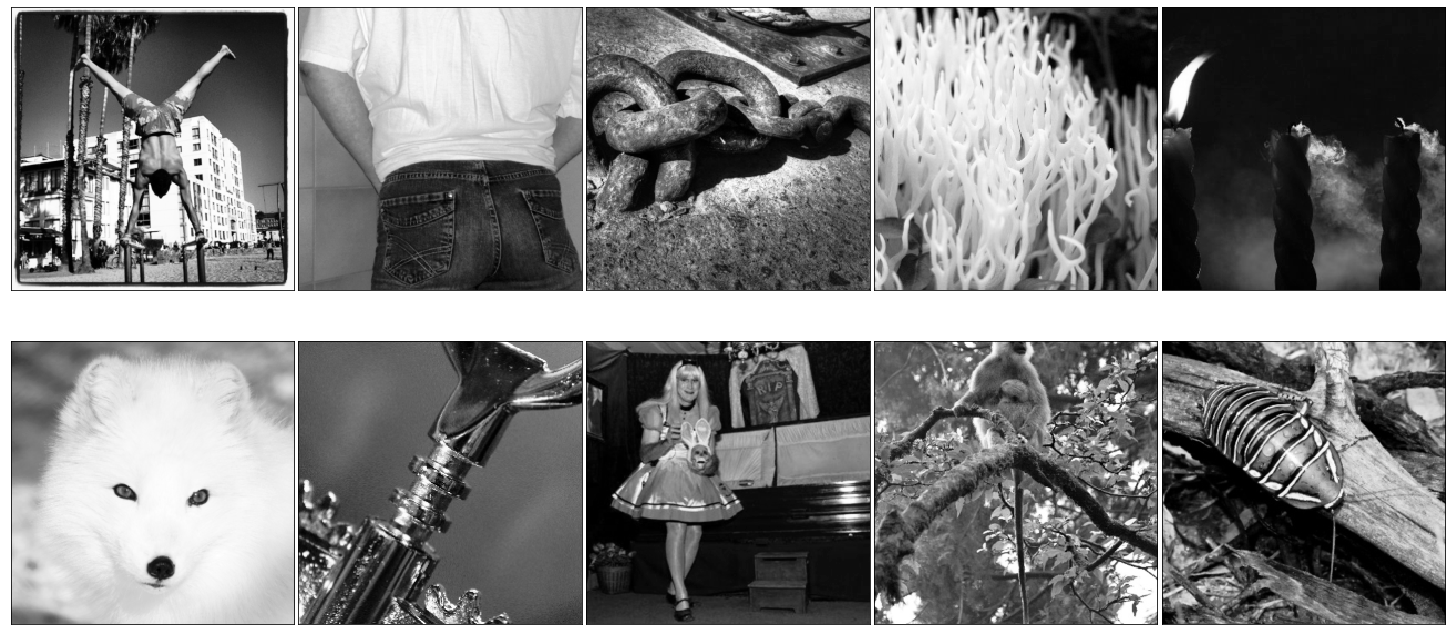

In [2]:
original_images = get_images('data/imagenet_v2_top_images', max_amount=10)
plot = plot_image_grid(original_images, ncols = 5)

# Gibbs Simulation

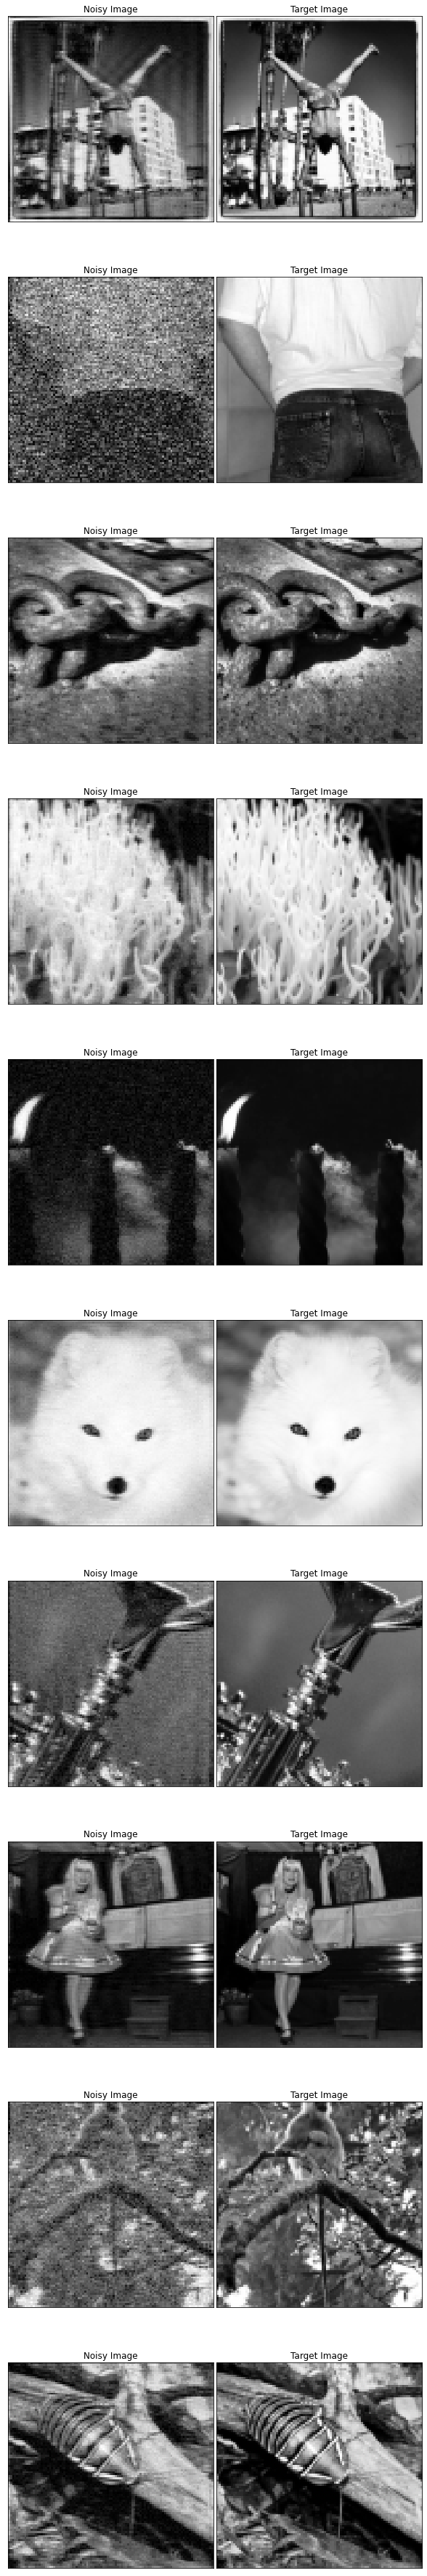

In [3]:
simulation = Simulation(input_size=(256, 256), cropped_size=(100, 100))
noisy_images, target_images = simulation.simulate_list_of_images(original_images)

all_images = [x for row in zip(noisy_images, target_images) for x in row]
titles = ['Noisy Image', 'Target Image'] * len(noisy_images)
plot_image_grid(all_images, titles, ncols=2)
plt.show()

# Configuration

In [4]:
gridsearch_configuration = get_gridsearch_configuration()

gridsearch_configuration.model_types = ['deep']
gridsearch_configuration.input_shapes = [[5,5], [10,10], [15,15], [20,20]]
gridsearch_configuration.numbers_of_hidden_channels = [32, 64]
gridsearch_configuration.numbers_of_layers = [2, 4, 6, 8, 10]
gridsearch_configuration.number_of_runs = 5

gridsearch_configuration.convergence_check_length = 100

gridsearch_configuration.log_frequency = 50
print(gridsearch_configuration)

number of GPUs:  1
image_dimensions: [256, 256, 1]  
result_path: data/results/2020-11-19-12:49-gridsearch.pkl  
model_types: ['deep']  
input_shapes: [[5, 5], [10, 10], [15, 15], [20, 20]]  
numbers_of_layers: [2, 4, 6, 8, 10]  
numbers_of_hidden_channels: [32, 64]  
number_of_runs: 5  
number_of_iterations: 30000  
learning_rate: 0.1  
convergence_check_length: 100  
log_frequency: 50  
find_best: True  
parameter_combinations: []  
data_type: <class 'torch.cuda.FloatTensor'>  



In [5]:
parameter_combinations = gridsearch_configuration.generate_parameter_combinations()
# for parameters in parameter_combinations:
#     print(parameters) 

# Fit all parameter combinations and save results

In [6]:
fitter = create_fitter_from_configuration(gridsearch_configuration)

In [ ]:
 for image_index, (noisy_image, target_image) in enumerate(zip(noisy_images, target_images)):
    for parameter_index, parameter_combination in enumerate(parameter_combinations):
        print(f'Image: {image_index+1}/{len(noisy_images)}, Parameter Combination: {parameter_index+1}/{len(parameter_combinations)}')
        print('+++' + str(parameter_combination) + '+++')
        model = create_model_from_parameter_combination(parameter_combination, noisy_image.shape)
        fitter(model, noisy_image, target_image)
        result = fitter.get_result()
        save_gridsearch_result(result, gridsearch_configuration.result_path)
        print('')

Image: 1/10, Parameter Combination: 1/200
+++('deep', [5, 5], 2, 32)+++
Step: 00800, Loss: 0.020373, Target Loss: 0.026842, Minimum Loss at: 673 with 0.0200030
Adam has converged at step 813.

Image: 1/10, Parameter Combination: 2/200
+++('deep', [5, 5], 2, 64)+++
Step: 01150, Loss: 0.021242, Target Loss: 0.027748, Minimum Loss at: 1094 with 0.019468
Adam has converged at step 1196.

Image: 1/10, Parameter Combination: 3/200
+++('deep', [5, 5], 4, 32)+++
Step: 00250, Loss: 0.019975, Target Loss: 0.026390, Minimum Loss at: 167 with 0.0194640
Adam has converged at step 268.

Image: 1/10, Parameter Combination: 4/200
+++('deep', [5, 5], 4, 64)+++
Step: 00350, Loss: 0.018215, Target Loss: 0.024502, Minimum Loss at: 261 with 0.0175020
Adam has converged at step 362.

Image: 1/10, Parameter Combination: 5/200
+++('deep', [5, 5], 6, 32)+++
Step: 00900, Loss: 0.007831, Target Loss: 0.013622, Minimum Loss at: 809 with 0.0066500
Adam has converged at step 910.

Image: 1/10, Parameter Combination